In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from encoding_information.information_estimation import *
from encoding_information.image_utils import *
from encoding_information.models.gaussian_process import StationaryGaussianProcess

from encoding_information.bsccm_utils import *
from bsccm import BSCCM
from jax import jit
import numpy as onp
import jax.numpy as np

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

2023-10-27 10:52:30.760959: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 10:52:31.480522: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cublas/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_cupti/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_nvcc/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_nvrtc/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/python3.10/site-packages/nvidia/cuda_runtime/lib:/home/hpinkard_waller/mambaforge/envs/phenotypes/lib/pyth

Opening BSCCM


In [ ]:
edge_crop = 32
patch_size = 10

num_images = 5000
num_patches = 5000
num_test_images = 500
num_test_patches = 500

channel = 'LED119'
confidence_interval = 90
num_bootstrap_samples = 50

all_images = load_bsccm_images(bsccm, channel, num_images=num_images + num_test_images, edge_crop=edge_crop, convert_units_to_photons=True, median_filter=True)
images = all_images[:num_images]
test_images = all_images[num_images:]
patches = extract_patches(images, patch_size=patch_size, num_patches=num_patches)
test_patches = extract_patches(test_images, patch_size=patch_size, num_patches=num_test_patches)


  0%|          | 0/10 [00:00<?, ?it/s]

2023-10-27 09:51:29.046289: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Initial validation NLL: 1.51


Epoch 1: 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]


Epoch 1: validation NLL: 1.51


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 52.65it/s]


Epoch 2: validation NLL: 1.51


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 56.89it/s]


Epoch 3: validation NLL: 1.53


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 57.54it/s]


Epoch 4: validation NLL: 1.51


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 63.75it/s]


Epoch 5: validation NLL: 1.51


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 65.81it/s]


Epoch 6: validation NLL: 1.51


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 65.16it/s]


Epoch 7: validation NLL: 1.51


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 65.08it/s]


Epoch 8: validation NLL: 1.53


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 64.07it/s]


Epoch 9: validation NLL: 1.52


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 64.00it/s]


Epoch 10: validation NLL: 1.52


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 64.94it/s]


Epoch 11: validation NLL: 2.18


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 66.94it/s]


evaluating likelihood


 10%|█         | 1/10 [00:19<02:55, 19.54s/it]

Initial validation NLL: 1.82


Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


Epoch 1: validation NLL: 1.83


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 56.12it/s]


Epoch 2: validation NLL: 1.83


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 56.19it/s]


Epoch 3: validation NLL: 1.82


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 58.49it/s]


Epoch 4: validation NLL: 1.84


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 63.95it/s]


Epoch 5: validation NLL: 1.83


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 164.09it/s]

evaluating likelihood



 20%|██        | 2/10 [00:27<01:40, 12.62s/it]

Initial validation NLL: 2.01


Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Epoch 1: validation NLL: 2.03


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 52.14it/s]


Epoch 2: validation NLL: 2.01


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 57.05it/s]


Epoch 3: validation NLL: 2.03


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 58.76it/s]


Epoch 4: validation NLL: 2.02


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 64.39it/s]


Epoch 5: validation NLL: 2.02


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 63.43it/s]


Epoch 6: validation NLL: 2.02


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 65.08it/s]


Epoch 7: validation NLL: 2.02


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 159.46it/s]

evaluating likelihood



 30%|███       | 3/10 [00:34<01:12, 10.32s/it]

Initial validation NLL: 2.18


Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.48s/it]


Epoch 1: validation NLL: 2.17


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 51.63it/s]


Epoch 2: validation NLL: 2.17


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 61.77it/s]


Epoch 3: validation NLL: 2.17


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 65.27it/s]


Epoch 4: validation NLL: 2.17


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 62.95it/s]


Epoch 5: validation NLL: 2.18


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 62.57it/s]


Epoch 6: validation NLL: 2.17


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 66.24it/s]


Epoch 7: validation NLL: 2.17


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 64.34it/s]


Epoch 8: validation NLL: 2.17


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 62.32it/s]


Epoch 9: validation NLL: 2.18


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 64.55it/s]


Epoch 10: validation NLL: 2.18


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 64.43it/s]


Epoch 11: validation NLL: 2.17


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 160.58it/s]

evaluating likelihood



 40%|████      | 4/10 [00:43<00:56,  9.47s/it]

Initial validation NLL: 2.29


Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Epoch 1: validation NLL: 2.30


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 52.54it/s]


Epoch 2: validation NLL: 2.29


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 54.80it/s]


Epoch 3: validation NLL: 2.28


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 61.09it/s]


Epoch 4: validation NLL: 2.29


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 64.50it/s]


Epoch 5: validation NLL: 2.29


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 65.78it/s]


Epoch 6: validation NLL: 2.29


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 60.53it/s]


Epoch 7: validation NLL: 2.29


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 63.28it/s]


Epoch 8: validation NLL: 2.30


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 149.59it/s]


evaluating likelihood


 50%|█████     | 5/10 [00:51<00:44,  8.97s/it]

Initial validation NLL: 2.67


Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]


Epoch 1: validation NLL: 2.67


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 47.79it/s]


Epoch 2: validation NLL: 2.66


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 58.90it/s]


Epoch 3: validation NLL: 2.67


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 63.86it/s]


Epoch 4: validation NLL: 2.66


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 65.49it/s]


Epoch 5: validation NLL: 2.66


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 63.25it/s]


Epoch 6: validation NLL: 2.67


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 64.85it/s]


Epoch 7: validation NLL: 2.66


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 149.48it/s]


evaluating likelihood


 60%|██████    | 6/10 [00:58<00:34,  8.56s/it]

Initial validation NLL: 3.04


Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


Epoch 1: validation NLL: 3.04


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 54.61it/s]


Epoch 2: validation NLL: 3.05


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 60.03it/s]


Epoch 3: validation NLL: 3.05


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 60.71it/s]


Epoch 4: validation NLL: 3.04


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 65.12it/s]


Epoch 5: validation NLL: 3.04


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 150.74it/s]

evaluating likelihood



 70%|███████   | 7/10 [01:06<00:24,  8.20s/it]

Initial validation NLL: 3.57


Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]


Epoch 1: validation NLL: 3.58


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 55.41it/s]


Epoch 2: validation NLL: 3.58


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 57.16it/s]


Epoch 3: validation NLL: 3.57


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 58.88it/s]


Epoch 4: validation NLL: 3.58


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 65.67it/s]


Epoch 5: validation NLL: 3.57


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 63.01it/s]


Epoch 6: validation NLL: 3.58


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 66.42it/s]


Epoch 7: validation NLL: 3.58


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 62.38it/s]


Epoch 8: validation NLL: 3.58


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 177.22it/s]

evaluating likelihood



 80%|████████  | 8/10 [01:13<00:15,  7.97s/it]

Initial validation NLL: 4.00


Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Epoch 1: validation NLL: 4.00


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 51.79it/s]


Epoch 2: validation NLL: 4.01


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 64.30it/s]


Epoch 3: validation NLL: 3.99


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 65.32it/s]


Epoch 4: validation NLL: 3.99


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 66.01it/s]


Epoch 5: validation NLL: 4.00


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 63.76it/s]


Epoch 6: validation NLL: 3.99


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 66.42it/s]


Epoch 7: validation NLL: 4.01


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 65.60it/s]


Epoch 8: validation NLL: 4.00


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 65.25it/s]


Epoch 9: validation NLL: 3.99


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 187.65it/s]

evaluating likelihood



 90%|█████████ | 9/10 [01:21<00:07,  7.91s/it]

Initial validation NLL: 4.72


Epoch 1: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


Epoch 1: validation NLL: 4.71


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 53.82it/s]


Epoch 2: validation NLL: 4.71


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 57.25it/s]


Epoch 3: validation NLL: 4.72


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 64.05it/s]


Epoch 4: validation NLL: 4.73


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 55.10it/s]


Epoch 5: validation NLL: 4.72


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 63.40it/s]


Epoch 6: validation NLL: 4.72


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 64.52it/s]


Epoch 7: validation NLL: 4.71


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 163.04it/s]

evaluating likelihood



100%|██████████| 10/10 [01:28<00:00,  8.85s/it]


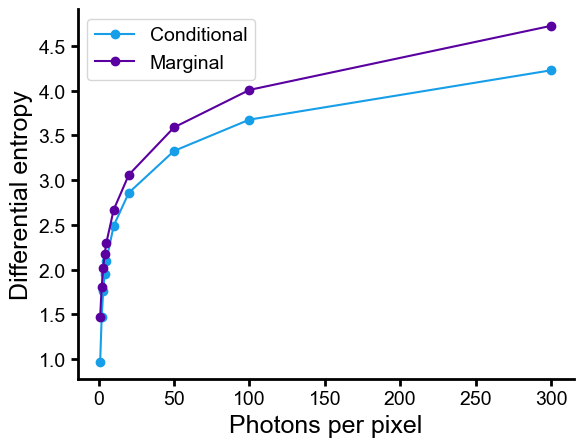

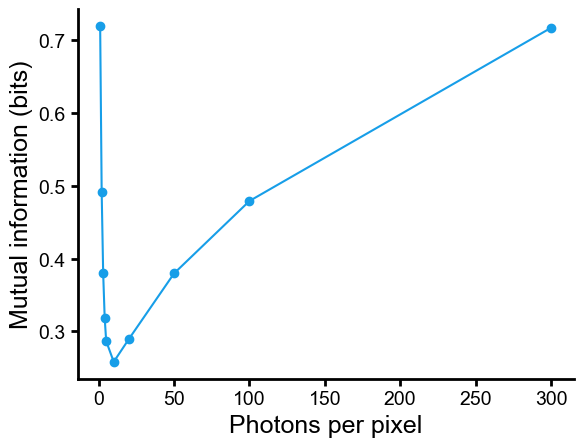

In [ ]:
photons_per_pixel_values = [1, 2, 3, 4, 5, 10, 20, 50, 100, 300]
eigenvalue_floor = 1e-8


conditionals = []
marginals = []
mi = []
for photons_per_pixel in tqdm(photons_per_pixel_values):
    noisy_patches = add_noise(patches * photons_per_pixel / np.mean(images), seed=123)
    noisy_test_patches = add_noise(test_patches * photons_per_pixel / np.mean(images), seed=123)
    h_y_given_x = estimate_conditional_entropy(noisy_patches) 
    gp = StationaryGaussianProcess(noisy_patches, eigenvalue_floor=eigenvalue_floor)
    gp.fit(noisy_patches, eigenvalue_floor=eigenvalue_floor)
    h_y_gaussian = gp.compute_negative_log_likelihood(noisy_test_patches)
    conditionals.append(h_y_given_x)
    marginals.append(h_y_gaussian)
    mi.append( (h_y_gaussian - h_y_given_x) / np.log(2))

# plot both
fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, conditionals, '-o', label='Conditional')
ax.plot(photons_per_pixel_values, marginals, '-o', label='Marginal')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Differential entropy')
ax.legend()
clear_spines(ax)

fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, mi, '-o')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Mutual information (bits)')
clear_spines(ax)

## Was the problem just estimating conditional from noisy samples?

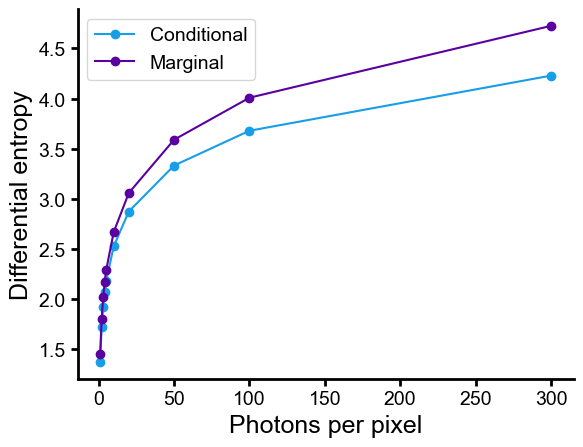

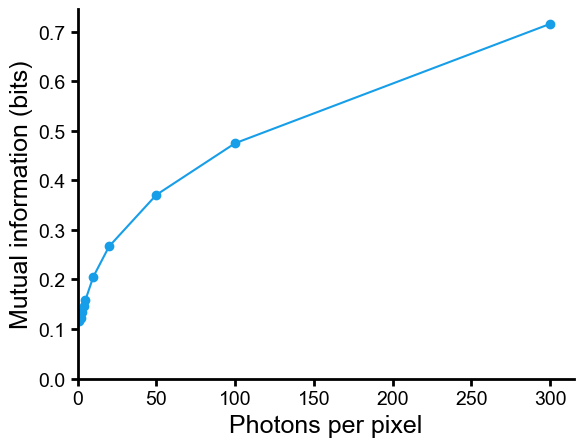

In [10]:
photons_per_pixel_values = [1, 2, 3, 4, 5, 10, 20, 50, 100, 300]
eigenvalue_floor = 1e-8


conditionals = []
marginals = []
mi_gaussian = []
for photons_per_pixel in tqdm(photons_per_pixel_values):
    clean_patches = patches * photons_per_pixel / np.mean(images)
    noisy_patches = add_noise(clean_patches, seed=123)
    noisy_test_patches = add_noise(test_patches * photons_per_pixel / np.mean(images), seed=123)
    h_y_given_x = estimate_conditional_entropy(clean_patches) 
    gp = StationaryGaussianProcess(noisy_patches, eigenvalue_floor=eigenvalue_floor)
    gp.fit(noisy_patches, eigenvalue_floor=eigenvalue_floor)
    h_y_gaussian = gp.compute_negative_log_likelihood(noisy_test_patches)
    conditionals.append(h_y_given_x)
    marginals.append(h_y_gaussian)
    mi_gaussian.append( (h_y_gaussian - h_y_given_x) / np.log(2))

# plot both
fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, conditionals, '-o', label='Conditional')
ax.plot(photons_per_pixel_values, marginals, '-o', label='Marginal')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Differential entropy')
ax.legend()
clear_spines(ax)

fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, mi_gaussian, '-o')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Mutual information (bits)')
ax.set(ylim=(0, None), xlim=(0, None))
clear_spines(ax)

## Does PixelCNN rescue it?

In [3]:
from encoding_information.models.pixel_cnn  import PixelCNN

photons_per_pixel_values = [1, 2, 3, 4, 5, 10, 20, 50, 100, 300]

conditionals = []
marginals = []
mi_pixel_cnn = []
for photons_per_pixel in tqdm(photons_per_pixel_values):
    clean_patches = patches * photons_per_pixel / np.mean(images)
    noisy_patches = add_noise(clean_patches, seed=123)
    noisy_test_patches = add_noise(test_patches * photons_per_pixel / np.mean(images), seed=123)
    h_y_given_x = estimate_conditional_entropy(clean_patches) 
    pcnn = PixelCNN(num_mixture_components=100)
    pcnn.fit(noisy_patches, sigma_min=1e-1, max_epochs=15)
    h_y_gaussian = pcnn.compute_negative_log_likelihood(noisy_test_patches)
    conditionals.append(h_y_given_x)
    marginals.append(h_y_gaussian)
    mi_pixel_cnn.append( (h_y_gaussian - h_y_given_x) / np.log(2))



  0%|          | 0/10 [00:00<?, ?it/s]

2023-10-27 10:40:31.616445: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Initial validation NLL: 2.30


Epoch 1: 100%|██████████| 100/100 [00:06<00:00, 14.65it/s]


Epoch 1: validation NLL: 1.46


Epoch 2: 100%|██████████| 100/100 [00:00<00:00, 104.45it/s]


Epoch 2: validation NLL: 1.46


Epoch 3: 100%|██████████| 100/100 [00:00<00:00, 101.59it/s]


Epoch 3: validation NLL: 1.47


Epoch 4: 100%|██████████| 100/100 [00:00<00:00, 102.73it/s]


Epoch 4: validation NLL: 1.45


Epoch 5: 100%|██████████| 100/100 [00:00<00:00, 112.93it/s]


Epoch 5: validation NLL: 1.46


Epoch 6: 100%|██████████| 100/100 [00:00<00:00, 109.86it/s]


Epoch 6: validation NLL: 1.45


Epoch 7: 100%|██████████| 100/100 [00:00<00:00, 113.44it/s]


Epoch 7: validation NLL: 1.46


  0%|          | 0/10 [00:28<?, ?it/s]


KeyboardInterrupt: 

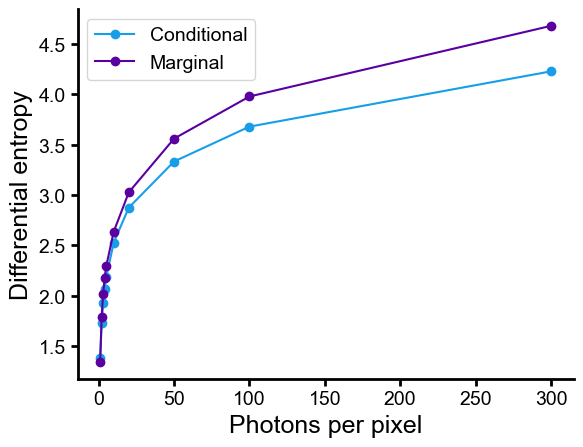

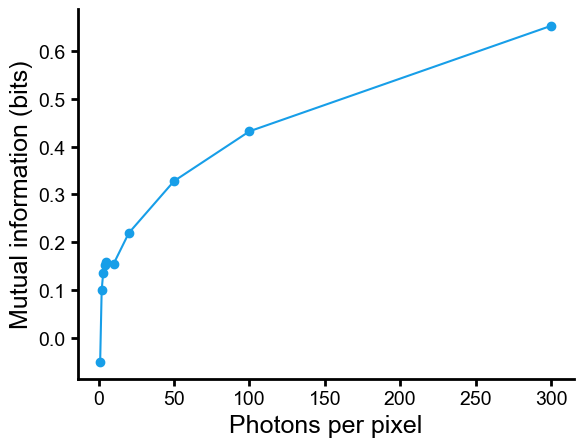

In [15]:
# plot both
fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, conditionals, '-o', label='Conditional')
ax.plot(photons_per_pixel_values, marginals, '-o', label='Marginal')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Differential entropy')
ax.legend()
clear_spines(ax)

fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, mi_gaussian, '-o', label='Gaussian')
ax.plot(photons_per_pixel_values, mi_pixel_cnn, '-o', label='PixelCNN')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Mutual information (bits)')
# ax.set(ylim=(0, None), xlim=(0, None))
clear_spines(ax)

## Does generating the conditional entropy estimate from samples from the gaussian fit rescue it?
run the first two notebooks cells to prep for this

Text(0.5, 0.98, 'MI with conditional entropy estimated from model samples')

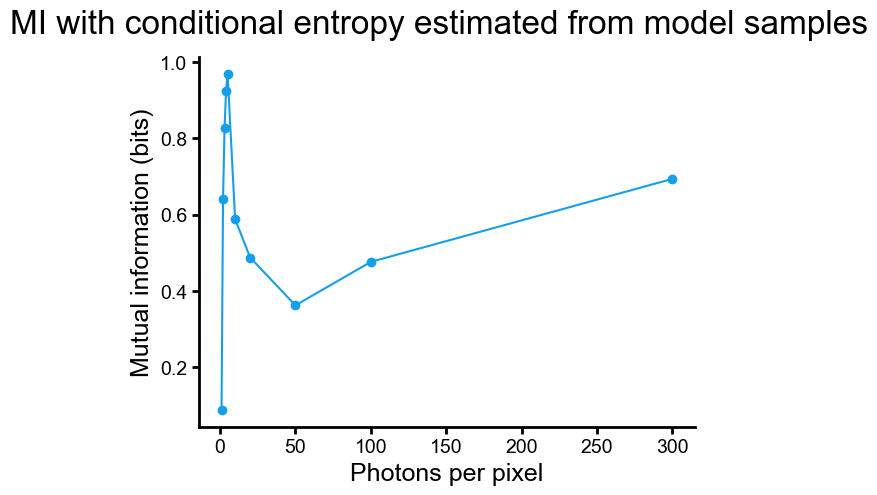

In [19]:
from encoding_information.information_estimation import *

# photons_per_pixel_values = [0.01, 0.1, 0.5, 1, 2, 4, 10, 50]
photons_per_pixel_values = [1, 2, 3, 4, 5, 10, 20, 50, 100, 300]
# photons_per_pixel_values = [10, 20, 50 , 100, 300]


mi = []
for photons_per_pixel in photons_per_pixel_values:
    noisy_patches = add_noise(patches * photons_per_pixel / np.mean(images), seed=123)
    noisy_patches + onp.random.normal(size=noisy_patches.shape) 
    lower_photon_clean_images = patches * photons_per_pixel / np.mean(images)
    mi.append(estimate_mutual_information(noisy_patches, eigenvalue_floor=1e-3,
                                          clean_images=lower_photon_clean_images, estimate_conditional_from_model_samples=True,
                                verbose=True))


fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, mi, '-o')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Mutual information (bits)')
clear_spines(ax)
fig.suptitle('MI with conditional entropy estimated from model samples')

## Does adding a bias offset help

Computing loss: 9it [00:02,  3.51it/s]


Initial validation NLL: 3.05


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.60s/it]
Computing loss: 9it [00:00, 63.74it/s]


Epoch 1: validation NLL: 3.06


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 17.72it/s]
Computing loss: 9it [00:00, 77.42it/s]


Epoch 2: validation NLL: 3.06


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]
Computing loss: 9it [00:00, 42.43it/s]


Epoch 3: validation NLL: 3.05


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]
Computing loss: 9it [00:00, 60.04it/s]


Epoch 4: validation NLL: 3.05


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 29.61it/s]
Computing loss: 9it [00:00, 61.17it/s]


Epoch 5: validation NLL: 3.05


Epoch 6: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]
Computing loss: 9it [00:00, 68.59it/s]


Epoch 6: validation NLL: 3.05


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 27.09it/s]
Computing loss: 9it [00:00, 65.75it/s]


Epoch 7: validation NLL: 3.05


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 39.17it/s]
Computing loss: 9it [00:00, 56.87it/s]


Epoch 8: validation NLL: 3.05


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]
Computing loss: 9it [00:00, 66.57it/s]


Epoch 9: validation NLL: 3.05


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 23.63it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 34.51it/s]
Computing loss: 9it [00:02,  3.84it/s].65s/it]


Initial validation NLL: 3.08


Epoch 1: 100%|██████████| 1/1 [00:09<00:00,  9.27s/it]
Computing loss: 9it [00:00, 51.87it/s]


Epoch 1: validation NLL: 3.08


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]
Computing loss: 9it [00:00, 56.85it/s]


Epoch 2: validation NLL: 3.08


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 23.67it/s]
Computing loss: 9it [00:00, 50.69it/s]


Epoch 3: validation NLL: 3.08


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]
Computing loss: 9it [00:00, 61.42it/s]


Epoch 4: validation NLL: 3.08


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 20.02it/s]
Computing loss: 9it [00:00, 53.28it/s]


Epoch 5: validation NLL: 3.08


Epoch 6: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]
Computing loss: 9it [00:00, 40.48it/s]


Epoch 6: validation NLL: 3.09


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 47.11it/s]
Computing loss: 9it [00:00, 48.58it/s]


Epoch 7: validation NLL: 3.08


Epoch 8: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]
Computing loss: 9it [00:00, 67.18it/s]


Epoch 8: validation NLL: 3.08


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 48.18it/s]
Computing loss: 9it [00:00, 67.94it/s]


Epoch 9: validation NLL: nan


Epoch 10: 100%|██████████| 1/1 [00:00<00:00, 36.09it/s]
Computing loss: 9it [00:00, 64.05it/s]


Epoch 10: validation NLL: nan


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 33.32it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 61.56it/s]
Computing loss: 9it [00:02,  3.70it/s].74s/it]


Initial validation NLL: 3.10


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.73s/it]
Computing loss: 9it [00:00, 61.79it/s]


Epoch 1: validation NLL: 3.11


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]
Computing loss: 9it [00:00, 69.57it/s]


Epoch 2: validation NLL: 3.10


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 24.91it/s]
Computing loss: 9it [00:00, 51.93it/s]


Epoch 3: validation NLL: 3.11


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 25.32it/s]
Computing loss: 9it [00:00, 50.33it/s]


Epoch 4: validation NLL: 3.11


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 43.15it/s]
Computing loss: 9it [00:00, 18.66it/s]


Epoch 5: validation NLL: 3.11


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 23.24it/s]
Computing loss: 9it [00:00, 53.08it/s]


Epoch 6: validation NLL: 3.10


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 21.54it/s]
Computing loss: 9it [00:00, 51.05it/s]


Epoch 7: validation NLL: 3.11


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 44.61it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 59.26it/s]
Computing loss: 9it [00:02,  3.76it/s].00s/it]


Initial validation NLL: 3.12


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.03s/it]
Computing loss: 9it [00:00, 46.58it/s]


Epoch 1: validation NLL: 3.13


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 20.43it/s]
Computing loss: 9it [00:00, 64.46it/s]


Epoch 2: validation NLL: 3.12


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]
Computing loss: 9it [00:00, 71.32it/s]


Epoch 3: validation NLL: 3.12


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]
Computing loss: 9it [00:00, 50.35it/s]


Epoch 4: validation NLL: 3.12


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]
Computing loss: 9it [00:00, 62.53it/s]


Epoch 5: validation NLL: 3.12


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 48.98it/s]
Computing loss: 9it [00:00, 63.83it/s]


Epoch 6: validation NLL: 3.12


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 26.76it/s]
Computing loss: 9it [00:00, 54.56it/s]


Epoch 7: validation NLL: 3.12


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 30.22it/s]
Computing loss: 9it [00:00, 27.53it/s]


Epoch 8: validation NLL: 3.12


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 26.03it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 80.83it/s]
Computing loss: 9it [00:02,  3.81it/s].70s/it]


Initial validation NLL: 3.15


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.21s/it]
Computing loss: 9it [00:00, 57.18it/s]


Epoch 1: validation NLL: 3.14


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 23.88it/s]
Computing loss: 9it [00:00, 62.36it/s]


Epoch 2: validation NLL: 3.14


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 34.74it/s]
Computing loss: 9it [00:00, 46.05it/s]


Epoch 3: validation NLL: 3.14


Epoch 4: 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]
Computing loss: 9it [00:00, 62.79it/s]


Epoch 4: validation NLL: 3.14


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 20.84it/s]
Computing loss: 9it [00:00, 66.49it/s]


Epoch 5: validation NLL: 3.14


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 24.94it/s]
Computing loss: 9it [00:00, 52.92it/s]


Epoch 6: validation NLL: 3.14


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 21.92it/s]
Computing loss: 9it [00:00, 44.63it/s]


Epoch 7: validation NLL: 3.15


Epoch 8: 100%|██████████| 1/1 [00:00<00:00, 42.10it/s]
Computing loss: 9it [00:00, 54.10it/s]


Epoch 8: validation NLL: 3.14


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 23.52it/s]
Computing loss: 9it [00:00, 33.94it/s]


Epoch 9: validation NLL: 3.14


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 39.39it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 56.77it/s]
Computing loss: 9it [00:02,  3.92it/s].49s/it]


Initial validation NLL: 3.25


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.53s/it]
Computing loss: 9it [00:00, 23.62it/s]


Epoch 1: validation NLL: 3.25


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]
Computing loss: 9it [00:00, 64.79it/s]


Epoch 2: validation NLL: 3.25


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 26.88it/s]
Computing loss: 9it [00:00, 68.69it/s]


Epoch 3: validation NLL: 3.25


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 37.21it/s]
Computing loss: 9it [00:00, 63.85it/s]


Epoch 4: validation NLL: 3.25


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]
Computing loss: 9it [00:00, 58.89it/s]


Epoch 5: validation NLL: 3.26


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 33.93it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 23.91it/s]
Computing loss: 9it [00:02,  4.00it/s].06s/it]


Initial validation NLL: 3.43


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.54s/it]
Computing loss: 9it [00:00, 50.63it/s]


Epoch 1: validation NLL: 3.42


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 21.69it/s]
Computing loss: 9it [00:00, 55.07it/s]


Epoch 2: validation NLL: 3.42


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]
Computing loss: 9it [00:00, 61.02it/s]


Epoch 3: validation NLL: 3.42


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 24.98it/s]
Computing loss: 9it [00:00, 55.20it/s]


Epoch 4: validation NLL: nan


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 25.95it/s]
Computing loss: 9it [00:00, 53.94it/s]


Epoch 5: validation NLL: nan


Epoch 6: 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
Computing loss: 9it [00:00, 56.37it/s]


Epoch 6: validation NLL: nan


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 44.99it/s]
Computing loss: 9it [00:00, 50.93it/s]


Epoch 7: validation NLL: nan


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 25.25it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 21.94it/s]
Computing loss: 9it [00:02,  3.67it/s].07s/it]


Initial validation NLL: 3.76


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.46s/it]
Computing loss: 9it [00:00, 39.68it/s]


Epoch 1: validation NLL: 3.76


Epoch 2: 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]
Computing loss: 9it [00:00, 68.06it/s]


Epoch 2: validation NLL: 3.76


Epoch 3: 100%|██████████| 1/1 [00:00<00:00, 24.48it/s]
Computing loss: 9it [00:00, 61.84it/s]


Epoch 3: validation NLL: 3.76


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 24.57it/s]
Computing loss: 9it [00:00, 61.96it/s]


Epoch 4: validation NLL: 3.76


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]
Computing loss: 9it [00:00, 62.64it/s]


Epoch 5: validation NLL: 3.76


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 34.05it/s]
Computing loss: 9it [00:00, 57.05it/s]


Epoch 6: validation NLL: 3.76


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 38.81it/s]
Computing loss: 9it [00:00, 78.21it/s]


Epoch 7: validation NLL: 3.75


Epoch 8: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
Computing loss: 9it [00:00, 64.79it/s]


Epoch 8: validation NLL: 3.76


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 38.30it/s]
Computing loss: 9it [00:00, 58.88it/s]


Epoch 9: validation NLL: 3.76


Epoch 10: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
Computing loss: 9it [00:00, 64.21it/s]


Epoch 10: validation NLL: 3.76


Epoch 11: 100%|██████████| 1/1 [00:00<00:00, 29.95it/s]
Computing loss: 9it [00:00, 61.96it/s]


Epoch 11: validation NLL: 3.77


Epoch 12: 100%|██████████| 1/1 [00:00<00:00, 25.06it/s]
Computing loss: 9it [00:00, 41.27it/s]


Epoch 12: validation NLL: 3.76


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 26.76it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 25.53it/s]
Computing loss: 9it [00:02,  3.75it/s].68s/it]


Initial validation NLL: 4.09


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.74s/it]
Computing loss: 9it [00:00, 102.30it/s]


Epoch 1: validation NLL: 4.10


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 44.51it/s]
Computing loss: 9it [00:00, 65.62it/s]


Epoch 2: validation NLL: 4.11


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
Computing loss: 9it [00:00, 62.15it/s]


Epoch 3: validation NLL: 4.10


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 24.92it/s]
Computing loss: 9it [00:00, 60.63it/s]


Epoch 4: validation NLL: 4.11


Epoch 5: 100%|██████████| 1/1 [00:00<00:00, 22.66it/s]
Computing loss: 9it [00:00, 66.27it/s]


Epoch 5: validation NLL: 4.10


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 91.26it/s]


evaluating likelihood


computing log likelihoods: 100%|██████████| 10/10 [00:00<00:00, 23.58it/s]
Computing loss: 9it [00:02,  3.71it/s].73s/it]


Initial validation NLL: 4.75


Epoch 1: 100%|██████████| 1/1 [00:08<00:00,  8.83s/it]
Computing loss: 9it [00:00, 51.86it/s]


Epoch 1: validation NLL: 4.75


Epoch 2: 100%|██████████| 1/1 [00:00<00:00, 21.65it/s]
Computing loss: 9it [00:00, 61.26it/s]


Epoch 2: validation NLL: 4.76


Epoch 3: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
Computing loss: 9it [00:00, 29.32it/s]


Epoch 3: validation NLL: 4.75


Epoch 4: 100%|██████████| 1/1 [00:00<00:00, 24.08it/s]
Computing loss: 9it [00:00, 70.21it/s]


Epoch 4: validation NLL: 4.74


Epoch 5: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]
Computing loss: 9it [00:00, 64.00it/s]


Epoch 5: validation NLL: 4.74


Epoch 6: 100%|██████████| 1/1 [00:00<00:00, 23.56it/s]
Computing loss: 9it [00:00, 64.33it/s]


Epoch 6: validation NLL: 4.76


Epoch 7: 100%|██████████| 1/1 [00:00<00:00, 45.70it/s]
Computing loss: 9it [00:00, 37.47it/s]


Epoch 7: validation NLL: 4.76


Epoch 8: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]
Computing loss: 9it [00:00, 64.12it/s]


Epoch 8: validation NLL: 4.75


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 39.70it/s]
Computing loss: 9it [00:00, 63.20it/s]


Epoch 9: validation NLL: 4.75


precomputing masks and variances: 100%|██████████| 10/10 [00:00<00:00, 26.75it/s]


evaluating likelihood


100%|██████████| 10/10 [05:56<00:00, 35.67s/it]


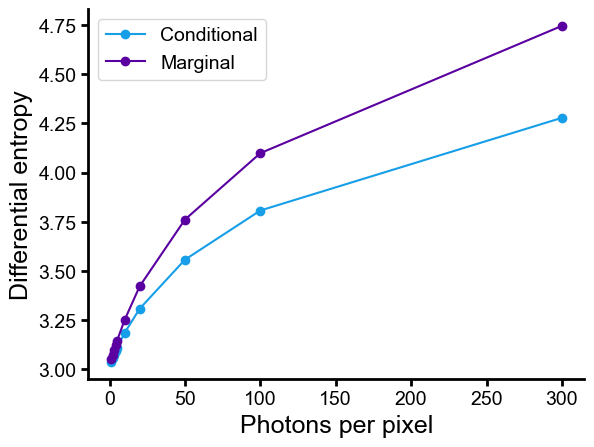

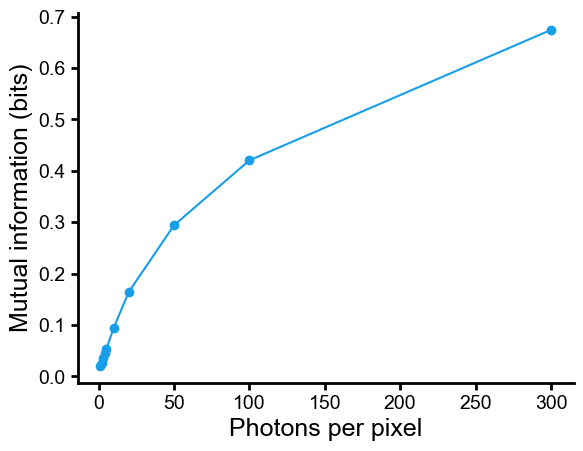

In [20]:
# photons_per_pixel_values = [0.01, 0.1, 0.5, 1, 2, 4, 10, 50]
photons_per_pixel_values = [1, 2, 3, 4, 5, 10, 20, 50, 100, 300]
# photons_per_pixel_values = [10, 20, 50 , 100, 300]
eigenvalue_floor = 1e-3

photon_bias = 25


conditionals = []
marginals = []
mi = []
for photons_per_pixel in tqdm(photons_per_pixel_values):
    noisy_patches = add_noise(patches * photons_per_pixel / np.mean(images) + photon_bias, seed=123)
    noisy_test_patches = add_noise(test_patches * photons_per_pixel / np.mean(images) + photon_bias, seed=123)
    h_y_given_x = estimate_conditional_entropy(noisy_patches) 
    gp = StationaryGaussianProcess(noisy_patches, eigenvalue_floor=eigenvalue_floor)
    gp.fit(noisy_patches, eigenvalue_floor=eigenvalue_floor)
    h_y_gaussian = gp.compute_negative_log_likelihood(noisy_test_patches)
    conditionals.append(h_y_given_x)
    marginals.append(h_y_gaussian)
    mi.append( (h_y_gaussian - h_y_given_x) / np.log(2))


photons_per_pixel_values = np.array(photons_per_pixel_values) + photon_bias

# plot both
fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, conditionals, '-o', label='Conditional')
ax.plot(photons_per_pixel_values, marginals, '-o', label='Marginal')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Differential entropy')
ax.legend()
clear_spines(ax)

fig, ax = plt.subplots()
ax.plot(photons_per_pixel_values, mi, '-o')
ax.set_xlabel('Photons per pixel')
ax.set_ylabel('Mutual information (bits)')
clear_spines(ax)